# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [3]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader


%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json




Populating the interactive namespace from numpy and matplotlib


### Define the function getCitiBikeCSV

In [83]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.csv.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.csv.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.csv.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [238]:
datestring = '201501'
getCitiBikeCSV(datestring)

('Downloading', '201801')
file in place, you can continue


In [85]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [86]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [87]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: there is no statistical difference in the age distribution of male and female riders**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [405]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [89]:
#dropping some data I no longer need
df.drop(['tripduration', 'starttime','stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'usertype', 'birth year', 'gender', 'date'],axis=1,inplace=True)
df.head()

,ageM,ageF
0,NaN,55.0
1,52.0,NaN
2,41.0,NaN
3,46.0,NaN
4,38.0,NaN


In [90]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

,ageM,ageF
count,227764.000000,52093.000000
mean,40.305272,38.951145
std,11.595240,11.405112
min,16.000000,17.000000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,116.000000,89.000000


In [91]:
# dropping NaN values
df['ageM'].dropna(inplace= True,how='all')
df['ageF'].dropna(inplace= True,how='all')
df.head()

,ageM,ageF
0,NaN,55.0
1,52.0,NaN
2,41.0,NaN
3,46.0,NaN
4,38.0,NaN


227764

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

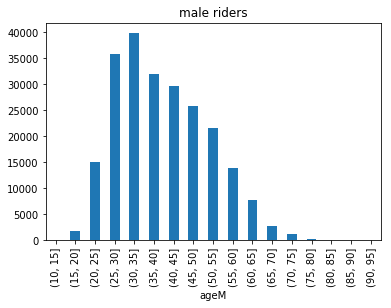

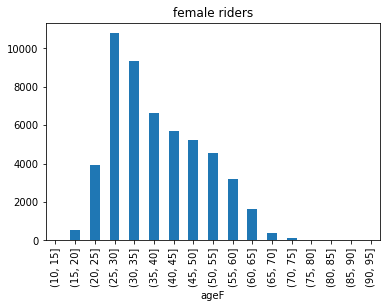

In [45]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders");


**Figure 1: histogrammed distribution of riders' ages by gender **
here is where you should have a nice caption that describes what I am looking at, why I am looking at it, and what I should notice

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.001657
(20, 25]       0.010955
(25, 30]       0.060955
(30, 35]       0.065548
(35, 40]       0.052146
(40, 45]       0.031750
(45, 50]       0.018657
(50, 55]       0.011015
(55, 60]       0.010957
(60, 65]       0.008149
(65, 70]       0.003203
(70, 75]       0.000663
(75, 80]       0.000188
(80, 85]       0.000002
(85, 90]       0.000075
(90, 95]       0.000000


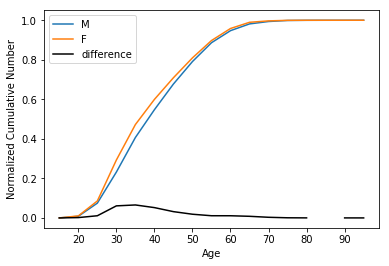

In [46]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' ages by gender** ... [a good caption here]

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [47]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [48]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.09128675483027056, pvalue=1.1723000718567192e-307)


**  FILL IN THE CELL BELOW!**

## your words here!...
## this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
## to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function
The scipy KS test returns the KS statistic, which is 0.9217, and a P-value, which is 1.1723000718567192e-307.
The KS statistic, aka D statistic, is the absolute max distance (supremum) between the CDFs of the two samples,
while.
We can reject the null hypothesis that the two samples were drawn from the same distribution if the p-value is less than the significance level(0.05)
In this case, we can reject the null hypothese. The two samples were not drawn the same distribution.





The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

In [37]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
#url="http://github.com/fedhere/PUI2018_fb55/Lab5_fb55_session1/ks2sample_table.png"
#Image(filename=url)

#### Redo KS for reducted dataset

In [222]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS
df_sample=df.sample(n=int(len(df)/200),random_state=111)
df_sample.shape


(1427, 2)

In [223]:
df_sample['ageM'].dropna(inplace= True)
df_sample['ageF'].dropna(inplace= True)


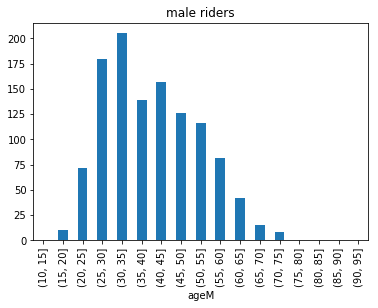

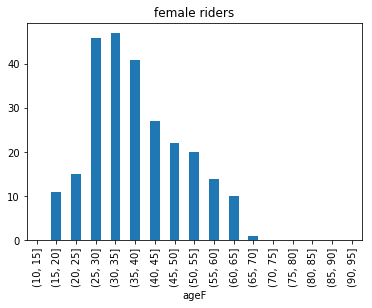

In [224]:
bins = np.arange(10, 99, 5)
axM = df_sample.ageM.groupby(pd.cut(df_sample.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df_sample.ageF.groupby(pd.cut(df_sample.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders");

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.034627
(20, 25]       0.031182
(25, 30]       0.056034
(30, 35]       0.063122
(35, 40]       0.103880
(40, 45]       0.073894
(45, 50]       0.051133
(50, 55]       0.029179
(55, 60]       0.013117
(60, 65]       0.016028
(65, 70]       0.006944
(70, 75]       0.000000
(75, 80]       0.000000
(80, 85]       0.000000
(85, 90]       0.000000
(90, 95]       0.000000


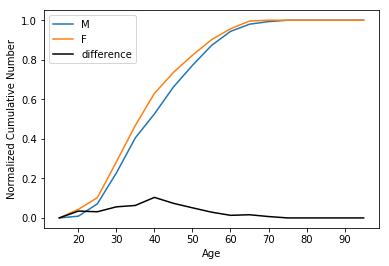

In [225]:
#print df.ageS, df.ageS.cumsum()

csM=df_sample.ageM.groupby(pd.cut(df_sample.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df_sample.ageF.groupby(pd.cut(df_sample.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

In [226]:
ks = scipy.stats.ks_2samp(df_sample.ageM, df_sample.ageF)
print (ks)

Ks_2sampResult(statistic=0.12674911733171135, pvalue=0.0022126063857061877)


### results and analysis
The KS stastic is 0.126749,is the absolute max distance (supremum) between the CDFs of the two samples.
The Pvalue is 0.0022126063857061877, which is smaller than the significant level 0.05. Thus we can reject the null hypothesis that the two samples were drawn from the same distribution. The two samples were not drawn the same distribution.

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [187]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis

#make the samples same size, and sorted
df_sample_m=np.sort(np.random.choice(df['ageM'].dropna(),size=len(df['ageF'])))
df_sample_f=np.sort(df['ageF'].dropna())

#make the coloms
df_sample2=pd.DataFrame([df_sample_m, df_sample_f]).T
df_sample2.columns=('male','female')



df_sample2.head()

,male,female
0,16.0,17.0
1,16.0,17.0
2,16.0,17.0
3,16.0,17.0
4,16.0,17.0


In [194]:
Pearson=scipy.stats.pearsonr(df_sample2.male,df_sample2.female)
print(Pearson)

(0.99557884163337873, 0.0)


### result and analysis
Refer to the documentation,Pearson correlation coefficient measures the linear relationship between two datasets. In our case the correlation coefficient is 0.99557884163337873 which is very high, indicating that these two variables have strong positive correlation. The P-value is 0, which is less than the significance level 0.05. So we can reject the null hypothesis that the correlation coefficient were in fact zero. 

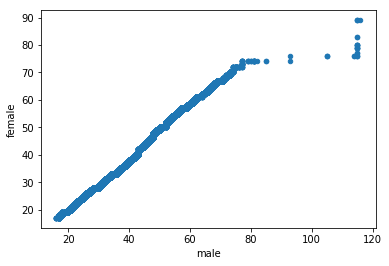

In [232]:
df_sample2.plot(x="male", y="female",kind = 'scatter')

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [233]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis
Spearman = scipy.stats.spearmanr(df_sample2.male,df_sample2.female)
print(Spearman)


SpearmanrResult(correlation=0.99917511041498497, pvalue=0.0)


** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

The Spearman correlation coefficent is 0.99917511041498497,which is very high, indicating that these two variables have strong positive correlation. The P-value is 0, which is less than the significance level 0.05. So we can reject the null hypothesis that the correlation coefficient were in fact zero.

### Conclusion
Both Pearson and Spearman test returned a high correlation coefficent with a P value less than the significant level 0.05. That means these two variables have strong positive correlation. The KS test indicates that these two variables are not drown from same distribution. 

### trip duration of bikers that ride during the day vs night 

**H0: there is no statistical difference in the distribution of trip duration of bikers that ride during the day vs night**
$$ \alpha = 0.05 $$

In [298]:
# Read in the data
datestring1 = '201801'
getCitiBikeCSV(datestring)


('Downloading', '201807')
file in place, you can continue


In [299]:
datestring2 = '201807'
getCitiBikeCSV(datestring)

('Downloading', '201807')
file in place, you can continue


In [307]:
df01 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
df01['date']=pd.to_datetime(df01['starttime'])
df01.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,2018-01-01 13:50:57.434
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,2018-01-01 15:33:30.182
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,2018-01-01 15:39:18.337
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,2018-01-01 15:40:13.372
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,2018-01-01 18:14:51.568


In [308]:
df07 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')
df07['date']=pd.to_datetime(df07['starttime'])
df07.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,500,2018-07-01 00:33:51.2640,2018-07-01 00:42:12.0280,72,W 52 St & 11 Ave,40.767272,-73.993929,3236,W 42 St & Dyer Ave,40.758985,-73.993800,16583,Subscriber,1981,1,2018-07-01 00:33:51.264
1,455,2018-07-01 02:06:54.0270,2018-07-01 02:14:29.0900,72,W 52 St & 11 Ave,40.767272,-73.993929,529,W 42 St & 8 Ave,40.757570,-73.990985,31481,Subscriber,1988,1,2018-07-01 02:06:54.027
2,1080,2018-07-01 02:09:16.4640,2018-07-01 02:27:17.0290,72,W 52 St & 11 Ave,40.767272,-73.993929,453,W 22 St & 8 Ave,40.744751,-73.999154,25004,Subscriber,1982,2,2018-07-01 02:09:16.464
3,632,2018-07-01 02:55:04.5870,2018-07-01 03:05:36.7910,72,W 52 St & 11 Ave,40.767272,-73.993929,465,Broadway & W 41 St,40.755136,-73.986580,25867,Subscriber,1986,1,2018-07-01 02:55:04.587
4,1676,2018-07-01 03:24:27.4350,2018-07-01 03:52:23.7760,72,W 52 St & 11 Ave,40.767272,-73.993929,3425,2 Ave & E 104 St,40.789210,-73.943708,31351,Subscriber,1992,1,2018-07-01 03:24:27.435


In [361]:
# Split data by day and night
# Define day time 6 am - 18 pm
# Define night time 18 pm -6 am
frames=[df01,df07]
df0107=pd.concat(frames)
df0107.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,2018-01-01 13:50:57.434
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,2018-01-01 15:33:30.182
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,2018-01-01 15:39:18.337
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,2018-01-01 15:40:13.372
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,2018-01-01 18:14:51.568


In [362]:
df0107.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [368]:
dftest=df0107.copy(deep=True)

In [369]:
dftest.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', u'bikeid',
       'usertype', 'birth year', 'gender'],axis=1,inplace=True)

In [370]:
dftest.head()

,tripduration,date
0,970,2018-01-01 13:50:57.434
1,723,2018-01-01 15:33:30.182
2,496,2018-01-01 15:39:18.337
3,306,2018-01-01 15:40:13.372
4,306,2018-01-01 18:14:51.568


In [435]:
daytime=dftest[(dftest['date'].dt.hour >= 6) &(dftest['date'].dt.hour <18)]
nighttime=dftest[(dftest['date'].dt.hour >= 18)|(dftest['date'].dt.hour < 6)]

In [436]:
daytime.head()

,tripduration,date
0,970,2018-01-01 13:50:57.434
1,723,2018-01-01 15:33:30.182
2,496,2018-01-01 15:39:18.337
3,306,2018-01-01 15:40:13.372
6,722,2018-01-02 07:54:53.646


In [437]:
daytime.shape

(1820192, 2)

In [438]:
nighttime.describe()

,tripduration
count,8.124270e+05
mean,1.062710e+03
std,2.886044e+04
min,6.100000e+01
25%,3.580000e+02
50%,6.090000e+02
75%,1.069000e+03
max,1.951005e+07


In [439]:
nighttime.shape

(812427, 2)

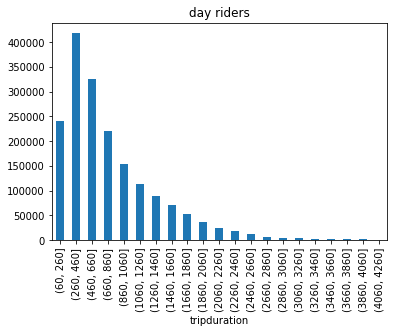

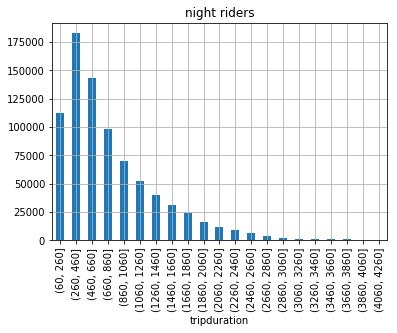

In [440]:
bins = np.arange(60,4300, 200)
axD = daytime.tripduration.groupby(pd.cut(daytime.tripduration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("day riders")
axN = nighttime.tripduration.groupby(pd.cut(nighttime.tripduration, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("night riders");
plt.grid(b=True)
plt.figure(figsize=(10,16))

figure 1:histogrammed distribution of day time riders and night time riders. 

              count_nonzero
tripduration               
(60, 260]          0.006079
(260, 460]         0.000652
(460, 660]         0.002539
(660, 860]         0.002784
(860, 1060]        0.001544
(1060, 1260]       0.000412
(1260, 1460]       0.000407
(1460, 1660]       0.001053
(1660, 1860]       0.001116
(1860, 2060]       0.000800
(2060, 2260]       0.000028
(2260, 2460]       0.000635
(2460, 2660]       0.001258
(2660, 2860]       0.001499
(2860, 3060]       0.001335
(3060, 3260]       0.001111
(3260, 3460]       0.000831
(3460, 3660]       0.000663
(3660, 3860]       0.000455
(3860, 4060]       0.000199
(4060, 4260]       0.000000


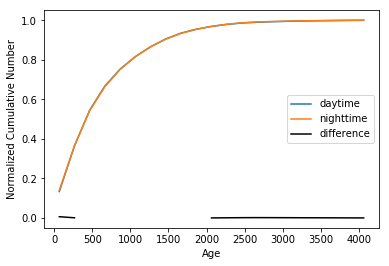

In [441]:
bins = np.arange(60,4300, 200)
csD=daytime.tripduration.groupby(pd.cut(daytime.tripduration, bins)).agg([count_nonzero]).cumsum()

csN=nighttime.tripduration.groupby(pd.cut(nighttime.tripduration, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))


pl.plot(bins[:-1] + 5, csD / csD.max(), label = "daytime")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "nighttime")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

# KS test

Figure 2: Commulative Distribution of the day time riders tripduration and night time riders tripduration. We can see that there is almost no difference between the tripduration from day riders and night riders.

In [443]:
ks = scipy.stats.ks_2samp(daytime.tripduration, nighttime.tripduration)
print (ks)

Ks_2sampResult(statistic=0.007094249778131477, pvalue=5.4715220824219872e-25)


### result and analysis
The KS stastic is 0.0070942,is the absolute max distance (supremum) between the CDFs of the two samples.
The Pvalue is 5.4715220824219872e-25, which is smaller than the significant level 0.05. Thus we can reject the null hypothesis that the two samples were drawn from the same distribution. The two samples were not drawn the same distribution.

# Pearson's test for correlation

In [448]:
#make the samples same size, and sorted
daysorted=np.sort(np.random.choice(daytime.tripduration,size=len(nighttime)))
nightsorted=np.sort(nighttime.tripduration.dropna())

dfsorted=pd.DataFrame([daysorted, nightsorted]).T
dfsorted.columns=('daytime','nighttime')

# #make the coloms

dfsorted.head()

,daytime,nighttime
0,61,61
1,61,61
2,61,61
3,61,61
4,61,61


In [449]:
Pearson=scipy.stats.pearsonr(dfsorted.daytime,dfsorted.nighttime)
print(Pearson)

(0.8563969440900896, 0.0)


### result and analysis
Refer to the documentation,Pearson correlation coefficient measures the linear relationship between two datasets. In our case the correlation coefficient is 0.8563969 which is high, indicating that these two variables have strong positive correlation. The P-value is 0, which is less than the significance level 0.05. So we can reject the null hypothesis that the correlation coefficient were in fact zero. 

# Spearman's test for correlation

In [450]:
Spearman = scipy.stats.spearmanr(dfsorted.daytime,dfsorted.nighttime)
print(Spearman)

SpearmanrResult(correlation=0.99999937459457233, pvalue=0.0)


### result and analysis
The Spearman correlation coefficent is 0.99999937459457233,which is very high, indicating that these two variables have strong positive correlation. The P-value is 0, which is less than the significance level 0.05. So we can reject the null hypothesis that the correlation coefficient were in fact zero.

# Conclusion
Both Pearson and Spearman test returned a high correlation coefficent with a P value less than the significant level 0.05. That means these two variables have strong positive correlation. The KS test indicates that these two variables are not drown from same distribution. 